__Applied Complex Analysis (2021)__

# Lecture 18: Orthogonal polynomials


We now introduce orthogonal polynomials (OPs). These are __fundamental__ for computational mathematics, with applications in
1. Function approximation
2. Quadrature (calculating integrals)
2. Solving differential equations
3. Spectral analysis of Schrödinger operators

We will investigate the properties of _general_ OPs, in this lecture:

1. Definition of orthogonal polynomials
2. Three-term recurrence relationships
3. Function approximation with orthogonal polynomials
2. Construction of orthogonal polynomials via Gram–Schmidt process



## Definition of orthogonal polynomials

Let $p_0(x),p_1(x),p_2(x),…$ be a sequence of polynomials such that $p_n(x)$ is exactly of degree $n$, that is,
$$
p_n(x) = k_n x^n + O(x^{n-1})
$$
where $k_n \neq 0$.

Let $w(x)$ be a continuous weight function on a (possibly infinite) interval $(a,b)$: that is $w(x) \geq 0$ for all $a < x < b$.
This induces an inner product
$$
\ip<f,g> := \int_a^b f(x) g(x) w(x) \dx
$$
We say that $\{p_0, p_1,\ldots\}$ are _orthogonal with respect to the weight $w$_ if
$$
\ip<p_n,p_m> = 0\qqfor n \neq m.
$$
Because $w$ is continuous, we have
$$
\norm{p_n}^2 = \ip<p_n,p_n> > 0 .
$$

Orthogonal polymomials are not unique: we can multiply each $p_n$ by a different nonzero constant $\tilde p_n(x) = c_n p_n(x)$, and
$\tilde p_n$ will be orthogonal w.r.t. $w$.  However, if we specify $k_n$, this is sufficient to uniquely define them:

**Proposition (Uniqueness of OPs I)** Given a non-zero $k_n$, there is a unique polynomial $p_n$ orthogonal w.r.t. $w$
to all lower degree polynomials.

**Proof** Suppose $r_n(x) = k_n x^n + O(x^{n-1})$ is another  OP w.r.t. $w$. We want to show $p_n - r_n$ is zero.
But this is a polynomial of degree $<n$, hence
$$
p_n(x) - r_n(x) = \sum_{k=0}^{n-1} c_k p_k(x)
$$
But we have for $k \leq n-1$
$$
\ip<p_k,p_k> c_k = \ip<p_n - r_n, p_k> = \ip<p_n,p_k> - \ip<r_n, p_k> = 0 - 0 = 0
$$
which shows all $c_k$ are zero.

■

**Corollary (Uniqueness of OPs I)** If $q_n$ and $p_n$ are orthogonal w.r.t. $w$ to all lower degree polynomials,
then $q_n(x) = C p_n(x)$ for some constant $C$.

### Monic orthogonal polynomials

If $k_n = 1$, that is,
$$
p_n(x) = x^n + O(x^{n-1})
$$
then we refer to the orthogonal polynomials as monic.

Monic OPs are unique as we have specified $k_n$.

### Orthonormal polynomials

If  $\norm{p_n} = 1$, then we refer to the orthogonal polynomials as orthonormal w.r.t. $w$.
We will usually use $q_n$ when they are orthonormal.   Note it's not unique: we can multiply by $\pm 1$ without changing the norm.


**Remark** The classical OPs are neither monic nor orthonormal (apart from one case). Many people make the mistake of using
orthonormal polynomials for computations. But there is a good reason to use classical OPs: their properties result in rational formulae,
whereas orthonormal polynomials require square roots. This makes a performance difference.

## Function approximation with orthogonal polynomials

A basic usage of orthogonal polynomials is for polynomial approximation.
Suppose $f(x)$ is a degree $n-1$ polynomial. Since $\{p_0(x),\ldots,p_{n-1}(x)\}$ span all degree $n-1$ polynomials, we know that
$$
f(x) = \sum_{k=0}^{n-1} f_k p_k(x)
$$
where
$$
f_k = {\ip<f, p_k> \over \ip<p_k,p_k>}
$$


Sometimes, we want to incorporate the weight into the approximation. This is typically one of two forms, depending on the application:
$$
f(x) = w(x) \sum_{k=0}^\infty f_k p_k(x)
$$
or
$$
        f(x) = \sqrt{w(x)} \sum_{k=0}^\infty f_k p_k(x)
$$
The $w(x)p_k(x)$ or $\sqrt{w(x)}p_k(x)$ are called weighted polynomials.



## Jacobi operators and three-term recurrences for general orthogonal polynomials
### Three-term recurrence relationships


A central theme: if you know the Jacobi operator / three-term recurrence, you know the polynomials.
This is the __best__ way to evaluate expansions in orthogonal polynomials: even for cases where we have explicit
formulae (e.g. Chebyshev polynomials $T_n(x) = \cos n \acos x$),
using the recurrence avoids evaluating trigonometric functions.

Every family of orthogonal polynomials has a three-term recurrence relationship:

**Theorem (three-term recurrence)** Suppose $\{p_n(x)\}$ are a family of orthogonal polynomials w.r.t. a weight $w(x)$.
Then there exists constants $a_n$, $b_n \neq 0$ and $c_n$ such that
$$
\begin{align*}
x p_0(x) = a_0 p_0(x) + b_0 p_1(x) \\
x p_n(x) = c_n p_{n-1}(x) + a_n p_n(x) + b_n p_{n+1}(x)
\end{align*}
$$

**Proof**
The first part follows since $p_0(x)$ and $p_1(x)$ span all degree 1 polynomials.

The second part follows essentially because multiplication by $x$ is "self-adjoint", that is,
$$
\ip<x f, g> = \int_a^b x f(x) g(x) w(x) \dx = \ip<f, x g>
$$
Therefore, if $f_m$ is a degree $m < n-1$ polynomial, we have
$$
\ip<x p_n, f_m> = \ip<p_n, x f_m> = 0.
$$
In particular, if we write
$$
x p_n(x) = \sum_{k=0}^{n+1} C_k p_k(x)
$$
then
$$
C_k = {\ip< x p_n, p_k> \over \norm{p_k}^2} = 0
$$
if $k < n-1$.

■


Monic polynomials clearly have $b_n = 1$.  Orthonormal polynomials have an even simpler form:

**Theorem (orthonormal three-term recurrence)** Suppose $\{q_n(x)\}$ are a family of orthonormal polynomials w.r.t. a weight $w(x)$.
Then there exists constants $a_n$ and $b_n$ such that
$$
\begin{align*}
x q_0(x) = a_0 q_0(x)  + b_0 q_1(x)\\
x q_n(x) = b_{n-1} q_{n-1}(x) + a_n q_n(x) + b_{n} q_{n+1}(x)
\end{align*}
$$

**Proof**
Follows again by self-adjointness of multiplication by $x$:
$$
c_n = \ip<x q_n, q_{n-1}> = \ip<q_n, x q_{n-1}> = \ip<x q_{n-1}, q_n> = b_{n-1}
$$
■


**Corollary (symmetric three-term recurrence implies orthonormality)** Suppose $\{p_n(x)\}$ are a family of orthogonal polynomials
w.r.t. a weight $w(x)$ such that
$$
\begin{align*}
x p_0(x) = a_0 p_0(x)  + b_0 p_1(x)\\
x p_n(x) = b_{n-1} p_{n-1}(x) + a_n p_n(x) + b_{n} p_{n+1}(x)
\end{align*}
$$
with $b_n \neq 0$. Suppose further that $\norm{p_0} = 1$. Then $p_n$ must be orthonormal.

**Proof** This follows from
$$
b_n = {\ip<x p_n,p_{n+1}> \over \norm{p_{n+1}}^2} = {\ip<x p_{n+1}, p_n> \over \norm{p_{n+1}}^2} = b_n   {\norm{p_n}^2 \over \norm{p_{n+1}}^2 }
$$
which implies
$$
\norm{p_{n+1}}^2 = \norm{p_n}^2 = \cdots = \norm{p_0}^2 = 1
$$
■

**Remark** We can scale $w(x)$ by a constant without changing the orthogonality properties, hence we can make $\|p_0\| = 1$ by changing the weight.

**Remark** This is beyond the scope of this course, but satisfying a three-term recurrence like this such that coefficients
are bounded with $p_0(x) = 1$ is sufficient to show that there exists a $w(x)$ (or more accurately, a Borel measure)
such that $p_n(x)$ are orthogonal w.r.t. $w$. The relationship between the coefficients $a_n,b_n$ and the $w(x)$ is
an object of study in spectral theory, particularly when the coefficients are periodic, quasi-periodic or random.

## Jacobi operators and multiplication by $x$

We can rewrite the three-term recurrence as
$$
x \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix} = J\begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix}
$$
where $J$ is a Jacobi operator, an infinite-dimensional tridiagonal matrix:
$$
J = \begin{pmatrix}
a_0 & b_0 \cr
c_1 & a_1 & b_1 \cr
& c_2 & a_2 & b_2 \cr
&& c_3 & a_3 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix}
$$

When the polynomials are monic, we have $1$ on the superdiagonal.  When we have an orthonormal basis, then $J$ is symmetric:
$$
J = \begin{pmatrix}
a_0 & b_0 \cr
b_0 & a_1 & b_1 \cr
& b_1 & a_2 & b_2 \cr
&& b_2 & a_3 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix}
$$


Given a polynomial expansion, $J$ tells us how to multiply by $x$ in coefficient space, that is, if
$$
f(x) = \sum_{k=0}^\infty f_k p_k(x) =   (p_0(x) ,  p_1(x) , \ldots ) \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix}
$$
then (provided the relevant sums converge absolutely and uniformly)
$$
x f(x) = x (p_0(x) ,  p_1(x) , \ldots ) \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix} =
    \left(J \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix}\right)^\top  \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix} = (p_0(x) ,  p_1(x) , \ldots ) X \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix}
$$
where $X := J^\top$.



### Evaluating polynomials


We can use the three-term recurrence to construct the polynomials.
One way to express this is in the language of linear algebra.
Suppose we are given $p_0(x) = k_0$ (where $k_0 = 1$ is pretty much always the case in practice). This can be written in matrix form as
$$
(1,0,0,0,0,\ldots) \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix} = k_0
$$
We can combine this with the Jacobi operator to get
$$
\underbrace{\begin{pmatrix}
1 \\
a_0-x & b_0 \\
c_1 & a_1-x & b_1 \\
& c_2 & a_2-x & b_2 \cr
&& c_3 & a_3-x & b_3 \cr
&&&\ddots & \ddots & \ddots
\end{pmatrix}}_{L_x} \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix} = \begin{pmatrix} k_0\cr 0 \cr 0 \cr \vdots \end{pmatrix}
$$
For $x$ fixed, this is a lower triangular system, that is, the polynomials equal
$$
k_0 L_x^{-1} \vc e_0
$$
This  can be solved  via forward recurrence:
$$
\begin{align*}
    p_0(x) &= k_0 \\
    p_1(x) &= {(x-a_0) p_0(x) \over b_0}\\
    p_2(x) &= {(x-a_1) p_0(x) - c_1 p_0(x) \over b_1}\\
    p_3(x) &= {(x-a_2) p_1(x) - c_2 p_1(x) \over b_2}\\
    &\vdots
\end{align*}
$$

We can use this to evaluate functions as well:
$$
f(x) = (p_0(x),p_1(x),\ldots) \begin{pmatrix}f_0 \\ f_1\\ \vdots \end{pmatrix} =
k_0 \vc e_0^\top L_x^{-\top}  \begin{pmatrix}f_0 \\ f_1\\ \vdots \end{pmatrix}
$$
when $f$ is a degree $n-1$ polynomial, this becomes a problem of inverting an upper triangular matrix,
that is, we want to solve the $n \times n$ system
$$
\underbrace{\begin{pmatrix}
1 & a_0-x & c_1 \\
& b_0 & a_1-x & c_2  \\
& & b_1 & a_2-x & \ddots  \\
& &     & b_2 & \ddots & c_{n-2} \\
&&&&\ddots & a_{n-2}-x \\
&&&&& b_{n-2}
\end{pmatrix}}_{L_x^\top} \begin{pmatrix} \gamma_0 \\\vdots\\ \gamma_{n-1} \end{pmatrix}
$$
so that $f(x)/k_0 = \gamma_0$. We can solve this  via back-substitution:
$$
\begin{align*}
\gamma_{n-1} &= {f_{n-1} \over b_{n-2}} \\
\gamma_{n-2} &= {f_{n-2} - (a_{n-2}-x) \gamma_{n-1} \over b_{n-3}} \\
\gamma_{n-3} &= {f_{n-3} - (a_{n-3}-x) \gamma_{n-2} - c_{n-2} \gamma_{n-1} \over b_{n-4}} \\
& \vdots \\
\gamma_1 &= {f_1 - (a_1-x) \gamma_2 - c_2 \gamma_3 \over b_0} \\
\gamma_0 &= f_0 - (a_0-x) \gamma_1 - c_1 \gamma_2
\end{align*}
$$
We give examples of these algorithms applied to Chebyshev polynomials in the next lecture.


## Gram–Schmidt algorithm

In general we don't have nice formulae for OPs but we can always construct them via the Gram–Schmidt process:

**Proposition (Gram–Schmidt)** Define
$$
\begin{align*}
p_0(x) = 1 \\
q_0(x) = {1 \over \norm{p_0}}\\
p_{n+1}(x) = x q_n(x) - \sum_{k=0}^n \ip<x q_n, q_k> q_k(x)\\
q_{n+1}(x) = {p_{n+1}(x) \over \norm{p_{n+1}}}
\end{align*}
$$
Then $q_0(x), q_1(x), \ldots$ are orthonormal w.r.t. $w$.

**Proof** By linearity we have
$$
\ip<p_{n+1}, q_j> = \ip<x q_n - \sum_{k=0}^n {\ip<x q_n, q_k>} q_k, q_j> = \ip<x q_n, q_j> - \ip<x q_n, q_j> \ip<q_j,q_j> = 0
$$
Thus $p_{n+1}$ is orthogonal to all lower degree polynomials. So is $q_{n+1}$, since it is a constant multiple of $p_{n+1}$.

■

Let's make our own family of OPs:

sum(q[2] * q[4] * w) = -9.920449878242366e-17


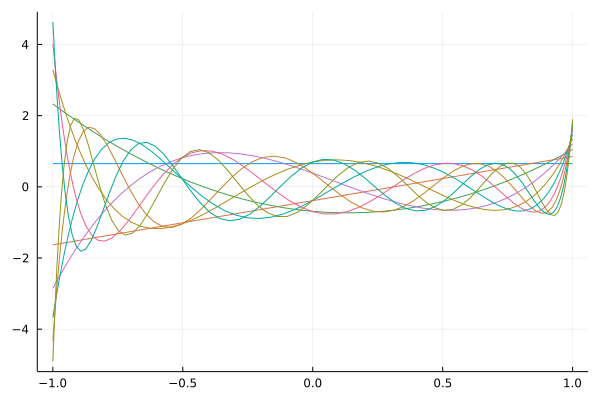

In [1]:
using ApproxFun, Plots
x = Fun()
w = exp(x)
ip = (f,g) -> sum(f*g*w)
nrm = f    -> sqrt(ip(f,f))
n = 10
q = Array{Fun}(undef,n)
p = Array{Fun}(undef,n)
p[1] = Fun(1, -1 .. 1 )
q[1] = p[1]/nrm(p[1])

for k=1:n-1
    p[k+1] = x*q[k]
    for j=1:k
        p[k+1] -= ip(p[k+1],q[j])*q[j]
    end
    q[k+1] = p[k+1]/nrm(p[k+1])
end

@show sum(q[2]*q[4]*w)

p = plot(; legend=false)
for k=1:10
    plot!(q[k])
end
p

The three-term recurrence means we can simplify Gram--Schmidt, and calculate the recurrence coefficients at the same time:


**Proposition (Gram–Schmidt)** Define
$$
\begin{align*}
p_0(x) &= 1 \\
q_0(x) &= {1 \over \norm{p_0}}\\
a_n &= \ip<x q_n, q_n> \\
b_{n-1} &= \ip<x q_n, q_{n-1}>\\
p_{n+1}(x) &= x q_n(x) -  a_n q_n(x) -  b_{n-1} q_{n-1}(x)\\
q_{n+1}(x) &= {p_{n+1}(x) \over \norm{p_{n+1}}}
\end{align*}
$$
Then $q_0(x), q_1(x), \ldots$ are orthonormal w.r.t. $w$.

**Remark** This can be made a bit more efficient by using $\norm{p_{n+1}}$ to calculate $b_n$.

In [2]:
x = Fun()
w = exp(x)
ip = (f,g) -> sum(f*g*w)
nrm = f    -> sqrt(ip(f,f))
n = 10
q = Array{Fun}(undef, n)
p = Array{Fun}(undef, n)
a = zeros(n)
b = zeros(n)
p[1] = Fun(1, -1 .. 1 )
q[1] = p[1]/nrm(p[1])

p[2] = x*q[1]
a[1] = ip(p[2],q[1])
p[2] -= a[1]*q[1]
q[2] = p[2]/nrm(p[2])

for k=2:n-1
    p[k+1] = x*q[k]
    b[k-1] =ip(p[k+1],q[k-1])
    a[k] = ip(p[k+1],q[k])
    p[k+1] = p[k+1] - a[k]q[k] - b[k-1]q[k-1]
    q[k+1] = p[k+1]/nrm(p[k+1])
end

ip(q[5],q[2]) # shows orthogonality (to numerical accuracy)

8.118505867571457e-16

Here we see a plot of the first 10 polynomials:

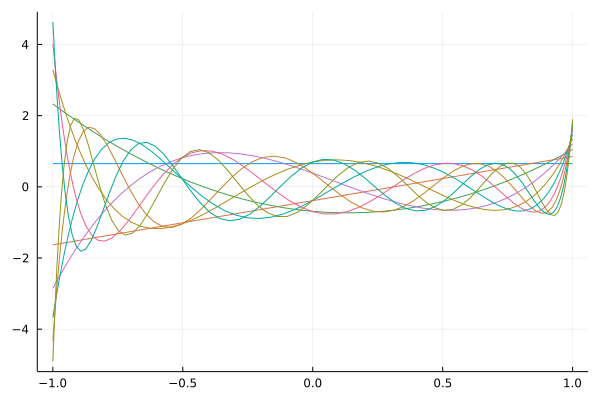

In [3]:
p = plot(; legend=false)
for k=1:10
    plot!(q[k])
end
p